In [ ]:
import cv2
import os
import random
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_dir = "/content/drive/MyDrive/Dataset/"

# Data Exploration

In [ ]:
path_file = []
label_file = []
file_name = []

for path, label, files in os.walk(dataset_dir):
  for name in files:
    path_file.append(os.path.join(path, name))
    label_file.append(path.split('/')[-1])
    file_name.append(name)

In [ ]:
for files in path_file:
  if not files.endswith((".jpg", ".jpeg")):
    print(files)

In [ ]:
print(len(path_file))
print(len(label_file))
print(len(file_name))

1345
1345
1345


In [ ]:
df = pd.DataFrame({"path" : path_file, "label" : label_file, "name" : file_name})
group = df.groupby(['label']).size()
print(group, '\n')
print("Total Label =", group.shape)

label
Aqua 300Ml              115
Bearbrand               138
Chitato                 146
Garnier Acno Fight      124
Garnier Turbo Bright    141
Indomie Ayam Spesial    123
Mie Goreng              168
Pepsodent               131
Rexona Antibacterial    118
Silverqueen              27
Sunlight                114
dtype: int64 

Total Label = (11,)


In [ ]:
df.sample(10)

path                 label  \
1051  /content/drive/MyDrive/Dataset/Bearbrand/IMG_2...             Bearbrand   
206   /content/drive/MyDrive/Dataset/Garnier Turbo B...  Garnier Turbo Bright   
512   /content/drive/MyDrive/Dataset/Sunlight/IMG202...              Sunlight   
14    /content/drive/MyDrive/Dataset/Garnier Acno Fi...    Garnier Acno Fight   
1339  /content/drive/MyDrive/Dataset/Mie Goreng/IMG2...            Mie Goreng   
190   /content/drive/MyDrive/Dataset/Garnier Turbo B...  Garnier Turbo Bright   
764   /content/drive/MyDrive/Dataset/Silverqueen/IMG...           Silverqueen   
379   /content/drive/MyDrive/Dataset/Rexona Antibact...  Rexona Antibacterial   
545   /content/drive/MyDrive/Dataset/Sunlight/IMG202...              Sunlight   
366   /content/drive/MyDrive/Dataset/Rexona Antibact...  Rexona Antibacterial   

                          name  
1051   IMG_20230529_104008.jpg  
206   IMG20230515193400_01.jpg  
512   IMG20230526133355_01.jpg  
14       IMG20230510184117.jpg  
1339     IMG20230529183752.jpg  
190      IMG20230515193341.jpg  
764      IMG20230526133700.jpg  
379      IMG20230515194353.jpg  
545      IMG20230526133428.jpg  
366      IMG20230515194335.jpg

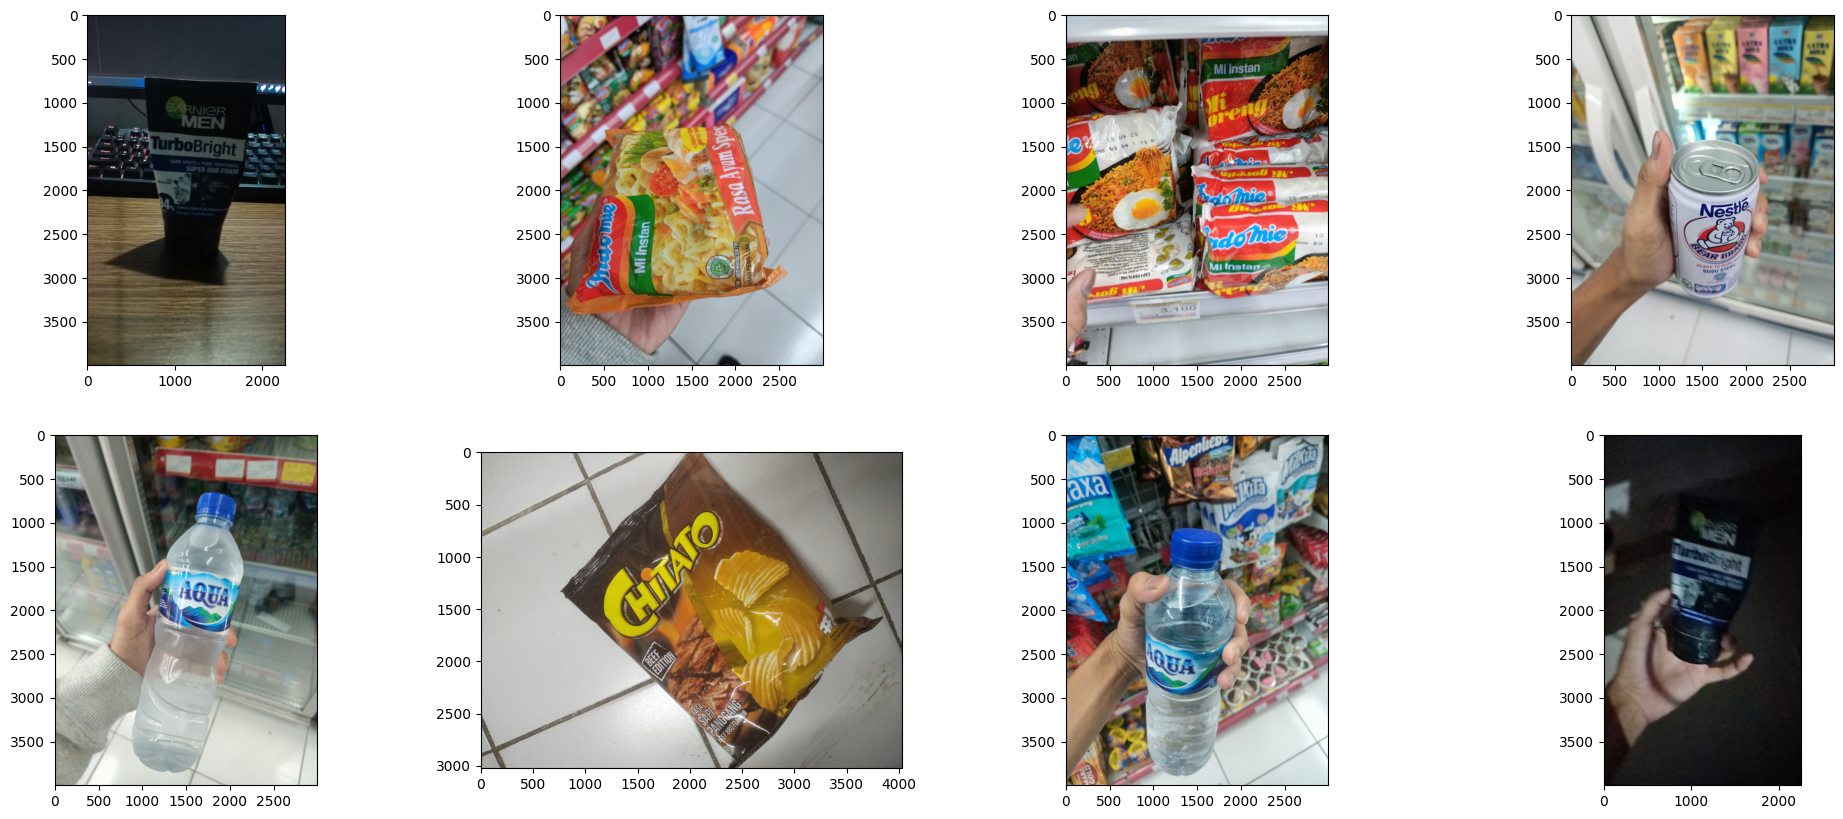

In [ ]:
fig, axes = plt.subplots(2,4, figsize = (25,10))

for ax in (axes):
  for x in ax:
    images = plt.imread(df["path"].sample().values[0])
    x.imshow(images)
plt.show()

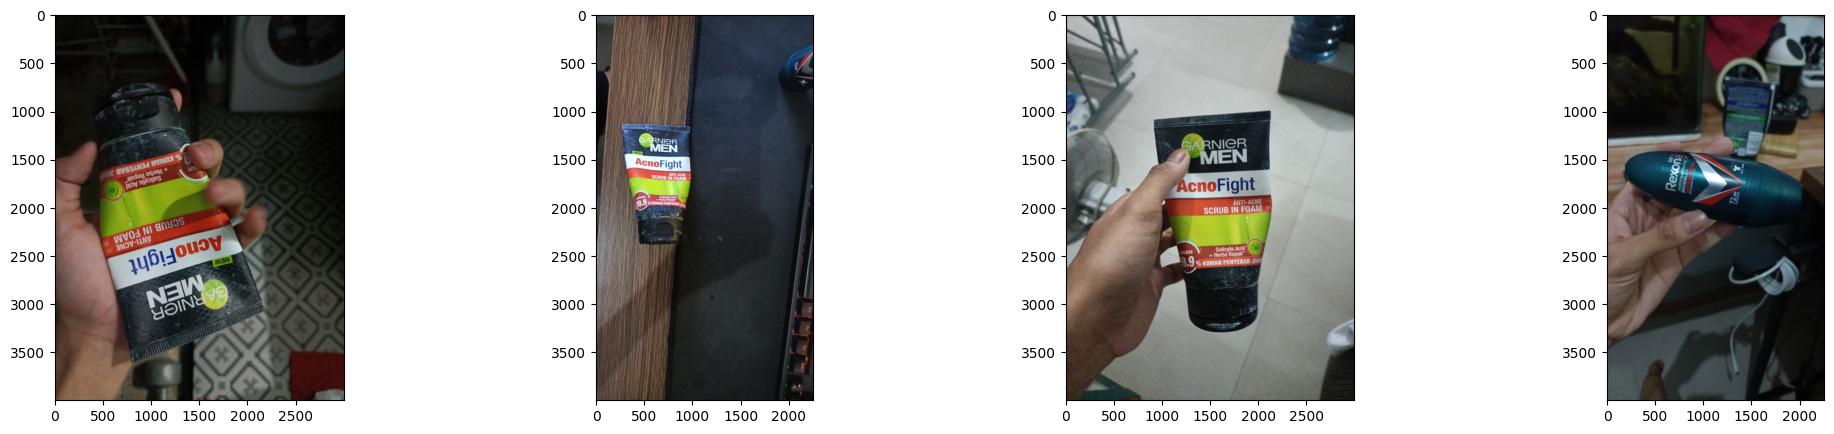

In [ ]:
fig, axes = plt.subplots(1,4, figsize = (25,5))

for i, ax in enumerate(axes):
  images = plt.imread(df["path"].sample().values[0])
  ax.imshow(images)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm_notebook

In [ ]:
X = df['path']
y = df['label']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
df_train = pd.DataFrame({
    'path' : X_train,
    'label' : y_train,
    'set' : 'train'
})
df_val = pd.DataFrame({
    'path' : X_val,
    'label' : y_val,
    'set' : 'val'
})
print(len(df_train))
print(len(df_val))

1076
269


In [ ]:
df_all = pd.concat([df_train, df_val])
print(df_all.groupby(['set', 'label']).size())
df_all.sample(5)

set    label               
train  Aqua 300Ml               95
       Bearbrand               112
       Chitato                 115
       Garnier Acno Fight       99
       Garnier Turbo Bright    115
       Indomie Ayam Spesial    104
       Mie Goreng              132
       Pepsodent               101
       Rexona Antibacterial     90
       Silverqueen              23
       Sunlight                 90
val    Aqua 300Ml               20
       Bearbrand                26
       Chitato                  31
       Garnier Acno Fight       25
       Garnier Turbo Bright     26
       Indomie Ayam Spesial     19
       Mie Goreng               36
       Pepsodent                30
       Rexona Antibacterial     28
       Silverqueen               4
       Sunlight                 24
dtype: int64


path                 label  \
881  /content/drive/MyDrive/Dataset/Aqua 300Ml/IMG2...            Aqua 300Ml   
883  /content/drive/MyDrive/Dataset/Aqua 300Ml/IMG2...            Aqua 300Ml   
199  /content/drive/MyDrive/Dataset/Garnier Turbo B...  Garnier Turbo Bright   
658  /content/drive/MyDrive/Dataset/Pepsodent/IMG20...             Pepsodent   
526  /content/drive/MyDrive/Dataset/Sunlight/IMG202...              Sunlight   

       set  
881    val  
883  train  
199  train  
658  train  
526    val

In [ ]:
df_all.iterrows

<bound method DataFrame.iterrows of                                                    path                 label  \
394   /content/drive/MyDrive/Dataset/Indomie Ayam Sp...  Indomie Ayam Spesial   
543   /content/drive/MyDrive/Dataset/Sunlight/IMG202...              Sunlight   
370   /content/drive/MyDrive/Dataset/Rexona Antibact...  Rexona Antibacterial   
551   /content/drive/MyDrive/Dataset/Sunlight/IMG202...              Sunlight   
1330  /content/drive/MyDrive/Dataset/Mie Goreng/IMG2...            Mie Goreng   
...                                                 ...                   ...   
816   /content/drive/MyDrive/Dataset/Aqua 300Ml/IMG2...            Aqua 300Ml   
54    /content/drive/MyDrive/Dataset/Garnier Acno Fi...    Garnier Acno Fight   
377   /content/drive/MyDrive/Dataset/Rexona Antibact...  Rexona Antibacterial   
785   /content/drive/MyDrive/Dataset/Aqua 300Ml/IMG2...            Aqua 300Ml   
109   /content/drive/MyDrive/Dataset/Garnier Acno Fi...    Garnier Acno F

In [ ]:
datasource_path = "/content/drive/MyDrive/Dataset/"
dataset_path = "/content/drive/MyDrive/DatasetCapstone/"

In [ ]:
tqdm_notebook.pandas()

for index, row in tqdm_notebook(df_all.iterrows(), total=len(df_all)):
  #Make label folder inside of train and val folder
  if os.path.exists(os.path.join(dataset_path, row['set'], row['label'])) == False:
    os.makedirs(os.path.join(dataset_path, row['set'], row['label']))
  
  #Make a file destination
  file_name = row['path'].split('/')[-1]
  file_destination = os.path.join(dataset_path, row['set'], row['label'], file_name)

  #copy file
  if os.path.exists(file_destination) == False:
    shutil.copy2(row['path'], file_destination)

  0%|          | 0/1345 [00:00<?, ?it/s]

In [ ]:
# Hyperparameter
dim = (224,224)
channel = (3, )
input_shape = dim + channel

# Batch Size
batch_size = 32

# Epoch
epoch = 10

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range = 20,
                                   fill_mode = 'nearest',
                                   horizontal_flip = True,
                                   vertical_flip = True)

In [ ]:
train_generator = image_datagen.flow_from_directory('/content/drive/MyDrive/DatasetCapstone/train',
                                                    target_size=dim,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    # save_to_dir = '/content/drive/MyDrive/Dataset Capstone/augmentasi/',
                                                    shuffle=True)

val_generator = image_datagen.flow_from_directory('/content/drive/MyDrive/DatasetCapstone/val',
                                                target_size=dim,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                # save_to_dir = '/content/drive/MyDrive/Dataset Capstone/augmentasi/',
                                                shuffle=True)

Found 1076 images belonging to 11 classes.
Found 269 images belonging to 11 classes.


In [ ]:
val_generator

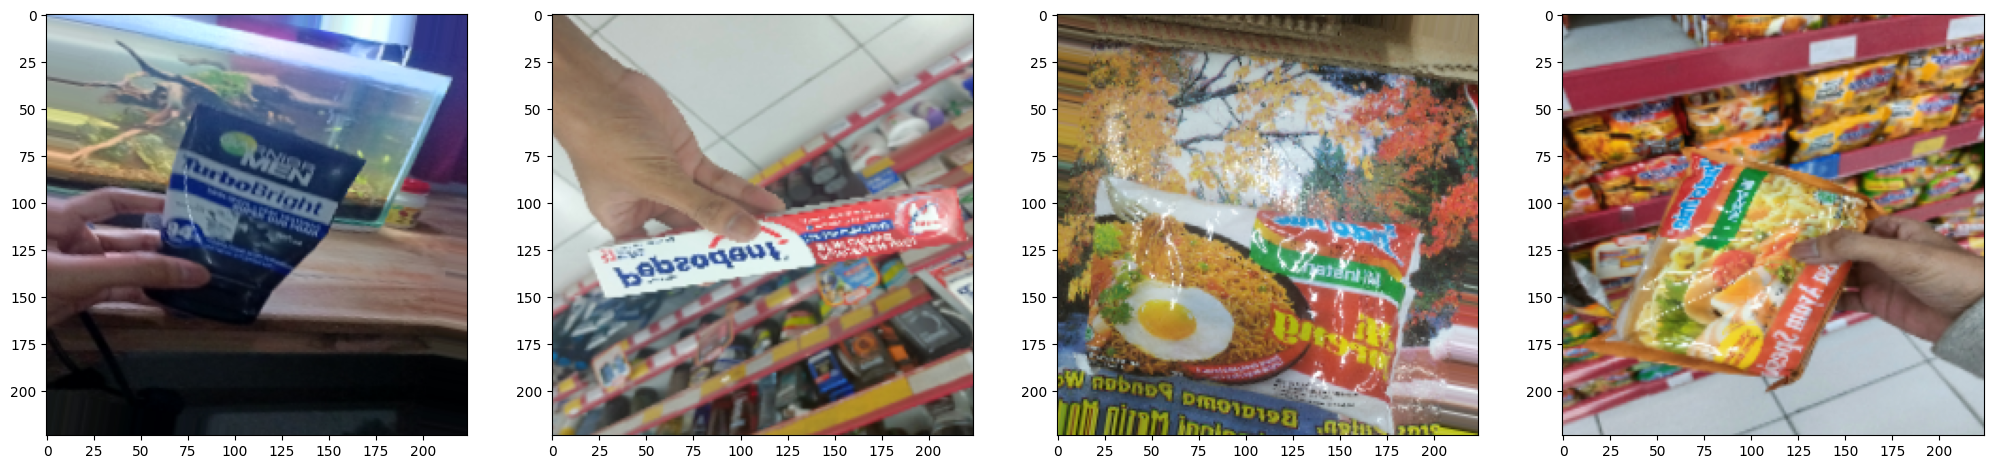

In [ ]:
images, labels = next(train_generator)

fig, axes = plt.subplots(nrows = 1, ncols=4, figsize=(25, 10))

for i in range(4):
  axes[i].imshow(images[i])
plt.show()

In [ ]:
val_generator[0]

(array([[[[0.66997   , 0.68565625, 0.6817347 ],
          [0.67493355, 0.6906198 , 0.68669826],
          [0.6798972 , 0.69558346, 0.6916619 ],
          ...,
          [0.38868368, 0.40649801, 0.383417  ],
          [0.37310275, 0.37757805, 0.35783175],
          [0.4265934 , 0.43120104, 0.40750015]],
 
         [[0.6613134 , 0.67201996, 0.6680984 ],
          [0.66060436, 0.6727291 , 0.6688075 ],
          [0.6598953 , 0.67343813, 0.66951656],
          ...,
          [0.38724765, 0.40586784, 0.38258535],
          [0.38034508, 0.38426664, 0.36410195],
          [0.42311698, 0.43050575, 0.40610954]],
 
         [[0.6839491 , 0.69179225, 0.6878707 ],
          [0.67827636, 0.6861195 , 0.6821979 ],
          [0.67260367, 0.6804468 , 0.67652524],
          ...,
          [0.3844665 , 0.40030554, 0.37771833],
          [0.39007914, 0.3940007 , 0.37314072],
          [0.4196405 , 0.42981046, 0.40471897]],
 
         ...,
 
         [[0.7176471 , 0.7176471 , 0.70980394],
          [0.72298

In [ ]:
def tf_data_generator(generator, input_shape):
  num_class = generator.num_classes
  tf_generator = tf.data.Dataset.from_generator(
      lambda: generator,
      output_types=(tf.float32, tf.float32),
      output_shapes=([None
                      , input_shape[0]
                      , input_shape[1]
                      , input_shape[2]]
                      ,[None, num_class])
  )
  return tf_generator
train_data = tf_data_generator(train_generator, input_shape)
val_data = tf_data_generator(val_generator, input_shape)

In [ ]:
val_data

<_FlatMapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 11), dtype=tf.float32, name=None))>

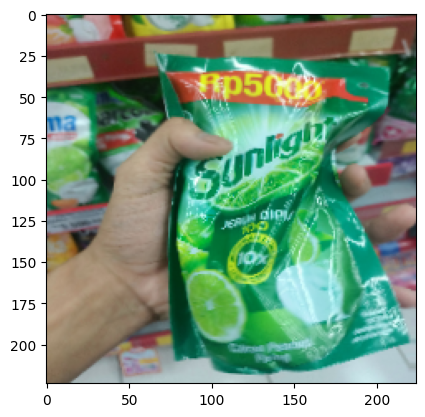

In [ ]:
for images, labels in train_data.take(3):
    # Ambil satu gambar dari batch
    image = images[0]

    # Tampilkan gambar menggunakan plt.imshow
    plt.imshow(image.numpy())
    plt.show()


In [ ]:
# Mengambil beberapa contoh data dari val_data
val_data_samples = val_data.take(1) 

# Mengonversi dataset menjadi iterator numpy
val_data_samples = list(val_data_samples.as_numpy_iterator())

# Menampilkan isi dari val_data
print("Isi dari val_data:")
for sample in val_data_samples:
  print(sample)

Isi dari val_data:
(array([[[[0.29605782, 0.21149644, 0.15808052],
         [0.28198916, 0.20598349, 0.13296957],
         [0.27001238, 0.19690573, 0.12602955],
         ...,
         [0.25236586, 0.300129  , 0.3739577 ],
         [0.25424168, 0.31888738, 0.40772274],
         [0.2542942 , 0.32670578, 0.4190001 ]],

        [[0.29018146, 0.20488551, 0.15587687],
         [0.2930074 , 0.21479808, 0.14398777],
         [0.2656051 , 0.193233  , 0.12015317],
         ...,
         [0.2527932 , 0.3297078 , 0.41749907],
         [0.25185528, 0.33158365, 0.41656116],
         [0.25072816, 0.33301806, 0.41562322]],

        [[0.2843051 , 0.19827458, 0.15367323],
         [0.30402562, 0.22361265, 0.15500599],
         [0.2611978 , 0.18956026, 0.1142768 ],
         ...,
         [0.2447241 , 0.32551298, 0.41412222],
         [0.24097243, 0.3208234 , 0.41318431],
         [0.23722076, 0.3161338 , 0.4122464 ]],

        ...,

        [[0.5984867 , 0.28613788, 0.20185833],
         [0.6031763 , 0.3

# Modeling


In [ ]:
from tensorflow.keras.applications import MobileNetV2
# # get base models
# base_model = MobileNetV2(
#     input_shape=input_shape,
#     include_top=False,
#     weights='imagenet',
#     classes=3,
# )

# MobileNetV2 ================================
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=input_shape)

# Base model
base_model.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras import layers,Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Conv2D, MaxPooling2D, Flatten

# #Adding custom layers
# # Add classification layers
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(32, activation='relu')(x)  # Example additional dense layer
# predictions = Dense(8, activation='softmax')(x)  # num_classes is the number of classes in your problem

# # Create the final model

# mobilenetv2===================================================
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(11, activation='softmax')) 


In [ ]:
# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(255, 255, 3)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(11, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 11)                14091     
                                                                 
Total params: 2,272,075
Trainable params: 14,091
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
# Compile the model
print('Compiling Model')
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Compiling Model


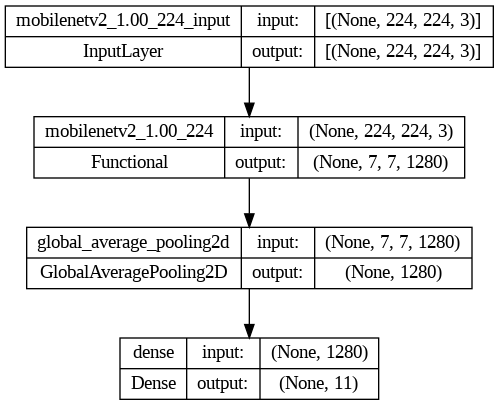

In [ ]:
from tensorflow.keras.utils import plot_model

# Visualisasi plot model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
EPOCH = 5
history = model.fit(x=train_data,
        steps_per_epoch=len(train_generator),
        epochs=EPOCH,
        validation_data=val_data,
        validation_steps=len(val_generator),
        shuffle=True,
        verbose = 1)

Epoch 1/5
34/34 [==============================] - 788s 23s/step - loss: 1.1527 - accuracy: 0.6552 - val_loss: 0.4830 - val_accuracy: 0.9145
Epoch 2/5
34/34 [==============================] - 404s 12s/step - loss: 0.3248 - accuracy: 0.9424 - val_loss: 0.2481 - val_accuracy: 0.9219
Epoch 3/5
34/34 [==============================] - 422s 13s/step - loss: 0.1874 - accuracy: 0.9730 - val_loss: 0.1641 - val_accuracy: 0.9703
Epoch 4/5
34/34 [==============================] - 384s 12s/step - loss: 0.1179 - accuracy: 0.9870 - val_loss: 0.1069 - val_accuracy: 0.9888
Epoch 5/5
34/34 [==============================] - 367s 11s/step - loss: 0.0923 - accuracy: 0.9888 - val_loss: 0.1021 - val_accuracy: 0.9851


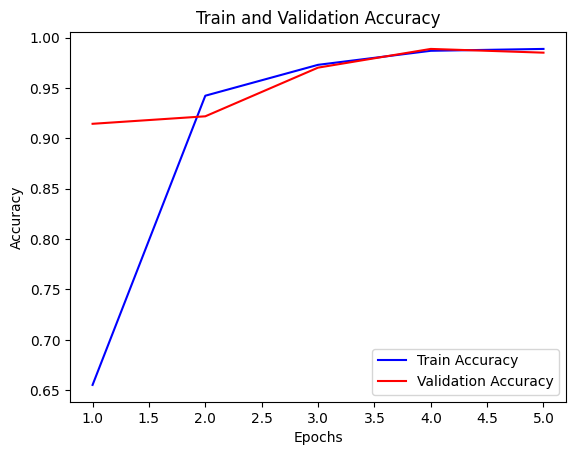

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, EPOCH + 1)

# Plot the accuration
plt.plot(epochs, train_acc, 'b', label='Train Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

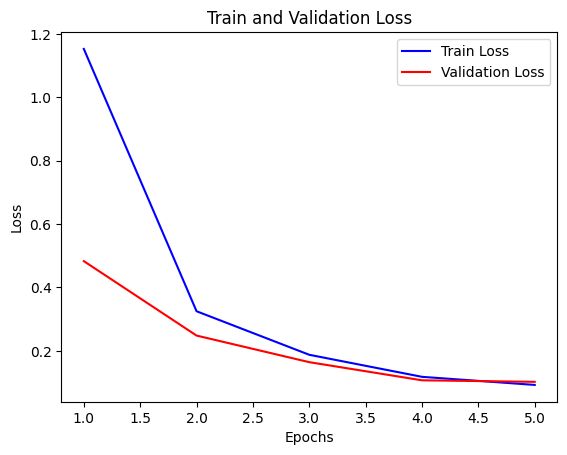

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, EPOCH + 1)

# Plot the loss
plt.plot(epochs, train_loss, 'b', label='Train Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
MODEL_BASE_PATH = "model"
SAVE_MODEL_NAME = "model MNV2 V2.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, SAVE_MODEL_NAME)
if os.path.exists(os.path.join(MODEL_BASE_PATH)) == False:
  os.makedirs(os.path.join(MODEL_BASE_PATH))
    
print('Saving Model At {}...'.format(save_model_path))
model.save(save_model_path,include_optimizer=False)

Saving Model At model/model MNV2 V2.h5...


In [ ]:
loss, acc = model.evaluate(val_data,steps=len(val_generator),verbose=0)
print('Accuracy on training data: {:.4f} \nLoss on training data: {:.4f}'.format(acc,loss),'\n')
 
loss, acc = model.evaluate(val_data,steps=len(val_generator),verbose=0)
print('Accuracy on val data: {:.4f} \nLoss on val data: {:.4f}'.format(acc,loss),'\n')

Accuracy on training data: 0.9851 
Loss on training data: 0.0958 

Accuracy on val data: 0.9851 
Loss on val data: 0.0849 



In [ ]:
import requests
from io import BytesIO
from PIL import Image
import numpy as np
# Parameters
input_size = (255,255)
#define input shape
channel = (3,)
input_shape = input_size + channel
#define labels
labels = ['Aqua 300ml', 'Bearbrand', 'Chitato', 'Garnier Acno Fight', 'Garnier Turbo Bright','Indomie Ayam Spesial', 'Mie Goreng', 'Pepsodent', 'Rexona Antibacterial', 'Silverqueen', 'Sunlight']

In [ ]:
def preprocess(img,input_size):
  nimg = img.convert('RGB').resize(input_size, resample= 0)
  img_arr = (np.array(nimg))/255
  return img_arr
def reshape(imgs_arr):
  return np.stack(imgs_arr, axis=0)

In [ ]:
from tensorflow.keras.models import load_model
MODEL_PATH = '/content/model/model MNV2.h5'
model = load_model(MODEL_PATH,compile=False)

OSError: ignored

In [ ]:
# read image
file_dir = '/content/drive/MyDrive/Test'
for i in(os.listdir(file_dir)):
  im = Image.open(os.path.join(file_dir,i))
  X = preprocess(im,input_size)
  X = reshape([X])
  y = model.predict(X)
  # plt.imshow(im)
  # plt.axis("off")
  print("Nama Produk = ", i)
  print(labels[np.argmax(y)], np.max(y))

1/1 [==============================] - 0s 112ms/step
Nama Produk =  Acno Fight.jpg
Garnier Acno Fight 0.76507056
1/1 [==============================] - 0s 109ms/step
Nama Produk =  Acno Figth 2.jpg
Garnier Acno Fight 0.7140454
1/1 [==============================] - 0s 121ms/step
Nama Produk =  acnofight.jpg
Garnier Acno Fight 0.8914448
1/1 [==============================] - 0s 102ms/step
Nama Produk =  Garnier Acno Fight.jpg
Garnier Acno Fight 0.66428524
1/1 [==============================] - 0s 113ms/step
Nama Produk =  Garnier Acno Fight (1).jpg
Garnier Acno Fight 0.9689088
1/1 [==============================] - 0s 118ms/step
Nama Produk =  Garnier Acno Fight (ketutup).jpg
Garnier Acno Fight 0.9592353
1/1 [==============================] - 0s 125ms/step
Nama Produk =  Garnier turbo bright(jauh).jpg
Garnier Turbo Bright 0.68288636
1/1 [==============================] - 0s 81ms/step
Nama Produk =  Garnier Turbo BRight.jpg
Garnier Turbo Bright 0.5404105
1/1 [============================

In [ ]:
path = '/content/drive/MyDrive/Test/aqua (Jauh).jpg'
im = Image.open(path)
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)
# print(X)
print(path.split('/')[-1])
print(labels[np.argmax(y)], np.max(y))
print(y[0])
print(labels)

1/1 [==============================] - 0s 95ms/step
aqua (Jauh).jpg
Garnier Turbo Bright 0.40426204
[0.12440331 0.19080909 0.01279943 0.06566963 0.40426204 0.02087007
 0.03057545 0.00680146 0.05522404 0.01430443 0.07428103]
['Aqua 300ml', 'Bearbrand', 'Chitato', 'Garnier Acno Fight', 'Garnier Turbo Bright', 'Indomie Ayam Spesial', 'Mie Goreng', 'Pepsodent', 'Rexona Antibacterial', 'Silverqueen', 'Sunlight']


# Export to tf lite

In [ ]:
from tensorflow.keras.models import load_model
import tensorflow as tf

path = "/content/model CNN.h5"
model = load_model(path)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
print("Converted!")

with open('model CNN Converted.tflite', 'wb') as f:
  f.write(tflite_model)

Converted!


In [ ]:
pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
import tensorflowjs as tfjs

# Load model dari file .h5
model = tf.keras.models.load_model('/content/model MNV2 V2.h5')

# Konversi model ke format JSON
tfjs.converters.save_keras_model(model, '/content/model_MNV2 V2_json')
